In [1]:
import numpy as np
import h5py
import cv2
import glob
import matplotlib.pyplot as plt

# The bytes file version

In [6]:
def visualise_goal_vs_path(poses,start,goal,legend_pos="upper right"):
    '''
    Visualise the goal path and the path taken
    
    
    '''

    start_x=start[0]
    start_y=start[1]    
    goal_x=goal[0]
    goal_y=goal[1]
    path_x=poses[:,0]
    path_y=poses[:,1]
    plt.plot(start_x,start_y,'ro',label="start")
    plt.plot(goal_x,goal_y,'go',label="goal")
    plt.plot(path_x,path_y,'-b',label="path")
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.grid()
    plt.title('Goal vs Path Relative to Staring Position')
    plt.legend(loc=legend_pos)
    plt.show()



def visualise_target_vs_iters(targets,legend_pos="upper right"):
    '''
    Visualise the goal path and the path taken
    
    
    '''
    abs_targets=np.ones(shape=(len(targets),1))
    abs_targets[:,0]=np.square(np.sum(targets[:,0:1],axis=0))   
    abs_targets[:,0]=np.sqrt(abs_targets[:,0])   
    plt.plot(abs_targets,'-b',label="path")
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.title('Goal vs Path')
    plt.legend(loc=legend_pos)
    plt.show()



def read_dataset(file_path):
    '''
    Read the data files from the dataset
    '''
    read_file= h5py.File(file_path, "r")
    batch_size= read_file['kris_dynamics']['odom_data']['target_vector'].shape[0]
    rgbs=[]
    depths=[]
    targets=[]  
    acts=[]
    for i in range(batch_size):
        target=read_file['kris_dynamics']['odom_data']['target_vector'][i]
        rgb=read_file['images']['rgb_data'][i]
        depth=read_file['images']['depth_data'][i]
        act=read_file['kris_dynamics']['odom_data']['odom_data_wheel'][i]    
        ## If visualisation is needed
        # if visualise_img:
        #     visualise(rgb_features,depth_features)  
        rgbs.append(rgb)
        depths.append(depth)
        targets.append(target) 
        acts.append(act)

    acts=np.array(acts[:-1])
    rgbs=np.array(rgbs)
    depths=np.array(depths)
    targets=np.array(targets)

    return acts,targets

In [7]:
demo_file='../GailNavigationNetwork/data/trajectories/tests/hard_world/test1.hdf5'
test_file=''
acts,targets=read_dataset(demo_file)
starting_pose=acts[0]
goal_pose=starting_pose+targets[0]
print(f"tagget shape {targets.shape}")

tagget shape (106, 7)


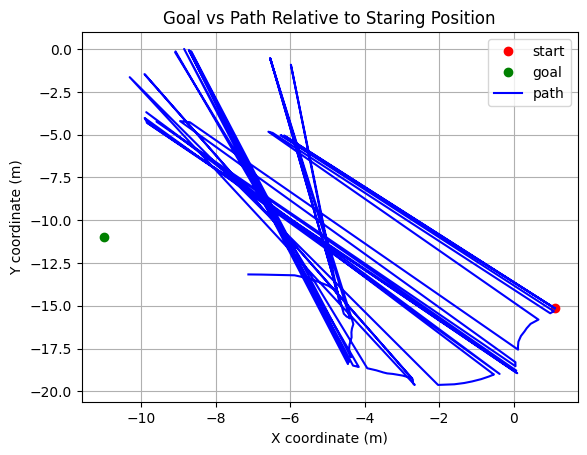

In [8]:
visualise_goal_vs_path(acts,starting_pose,goal_pose)

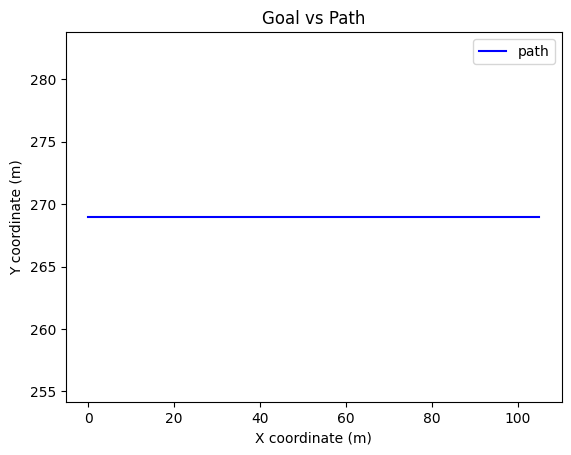

In [5]:
visualise_target_vs_iters(targets=targets)